# Capstone Project - 

## Open University Learning Analytics dataset

### Source:
https://analyse.kmi.open.ac.uk/open_dataset#description



# Capstone Project - Optimising Student Retention and Educational Outcomes 02

Modelling / Evaluation

## Open University Learning Analytics dataset

### Source:
https://analyse.kmi.open.ac.uk/open_dataset#description



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load and Inspect Data

In [2]:
data = pd.read_csv('oulad_01.csv')
data.head()

at_risk  gender  num_of_prev_attempts_capped  studied_credits  disability  \
0        0       1                            0              240           0   
1        0       0                            0               60           0   
2        0       0                            0               60           0   
3        0       0                            0               60           0   
4        0       1                            0               60           0   

   frequent_activity_variety_f4w  cma_tma_weight_ratio  \
0                            4.0                   0.0   
1                            6.0                   0.0   
2                            6.0                   0.0   
3                            6.0                   0.0   
4                            5.0                   0.0   

   vle_avg_engagement_f4w  weekly_avg_click_f4w  weekly_avg_access_times_f4w  \
0                0.029851                100.25                        15.00   
1                0.067164                137.50                        37.25   
2                0.078358                119.50                        34.00   
3                0.089552                141.75                        37.75   
4                0.119403                181.75                        46.50   

   ...  subpage_prop  url_prop  assessment1_weight  \
0  ...      0.052369  0.002494                10.0   
1  ...      0.100000  0.049091                10.0   
2  ...      0.104603  0.035565                10.0   
3  ...      0.049383  0.010582                10.0   
4  ...      0.042641  0.015131                10.0   

   assessment1_weighted_score  highest_education_grouped_HE Qualification  \
0                         7.8                                        True   
1                         7.0                                        True   
2                         7.2                                       False   
3                         6.9                                       False   
4                         7.9                                       False   

   highest_education_grouped_Lower Than A Level  imd_band_group_over 50%  \
0                                         False                     True   
1                                         False                    False   
2                                         False                     True   
3                                          True                     True   
4                                         False                     True   

   imd_band_group_up to 50%  cluster_1  cluster_2  
0                     False      False      False  
1                      True       True      False  
2                     False       True      False  
3                     False       True      False  
4                     False       True      False  

[5 rows x 29 columns]

In [3]:
# X = data[predictors]
# y = data['final_result']
X = data.drop(columns='at_risk')
y = data['at_risk']


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27553 entries, 0 to 27552
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   gender                                        27553 non-null  int64  
 1   num_of_prev_attempts_capped                   27553 non-null  int64  
 2   studied_credits                               27553 non-null  int64  
 3   disability                                    27553 non-null  int64  
 4   frequent_activity_variety_f4w                 27553 non-null  float64
 5   cma_tma_weight_ratio                          27553 non-null  float64
 6   vle_avg_engagement_f4w                        27553 non-null  float64
 7   weekly_avg_click_f4w                          27553 non-null  float64
 8   weekly_avg_access_times_f4w                   27553 non-null  float64
 9   avg_biweekly_click_change                     27553 non-null 

In [5]:
seed = 42

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Check the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22042, 28), (5511, 28), (22042,), (5511,))

In [6]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to the numerical columns - not needed for tree-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=seed, class_weight='balanced'), #,
    'Decision Trees': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed, class_weight='balanced'), # taking too long
    'LightGBM': LGBMClassifier(random_state=seed, verbose=0, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(random_state=seed, verbose=0, auto_class_weights='Balanced'), # taking too long
    'XGBoost': XGBClassifier(random_state=seed, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=seed),
    'K-Nearest Neighbors': KNeighborsClassifier(weights='distance', n_neighbors=5) 
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
      
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled) 
    
    # Print the classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred)) # , target_names=label_encoder.classes_
    print("="*60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      3077
           1       0.66      0.65      0.66      2434

    accuracy                           0.70      5511
   macro avg       0.70      0.70      0.70      5511
weighted avg       0.70      0.70      0.70      5511

Model: Decision Trees
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3077
           1       0.59      0.59      0.59      2434

    accuracy                           0.64      5511
   macro avg       0.63      0.63      0.63      5511
weighted avg       0.64      0.64      0.64      5511

Model: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      3077
           1       0.73      0.58      0.64      2434

    accuracy                           0.72      5511
   macro avg       0.72      0.70      0.70      5511
weig

In [8]:
lgb_model = LGBMClassifier(random_state=seed, class_weight='balanced')
lgb_model.fit(X_train, y_train)

# Get feature importance
importance = lgb_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importances for LightGBM:")
importance_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Feature Importances for LightGBM:


Feature  Importance
21                    assessment1_weighted_score         412
14                                oucontent_prop         193
6                         vle_avg_engagement_f4w         190
18                                  subpage_prop         186
17                                 resource_prop         179
9                      avg_biweekly_click_change         176
11                                 homepage_prop         174
20                            assessment1_weight         167
7                           weekly_avg_click_f4w         155
8                    weekly_avg_access_times_f4w         152
19                                      url_prop         144
10                                  forumng_prop         126
16                                     quiz_prop         114
15                                   ouwiki_prop          92
12                          less_common_vle_prop          91
2                                studied_credits          71
5                           cma_tma_weight_ratio          60
13                            oucollaborate_prop          59
23  highest_education_grouped_Lower Than A Level          51
1                    num_of_prev_attempts_capped          44
25                      imd_band_group_up to 50%          44
4                  frequent_activity_variety_f4w          35
0                                         gender          24
3                                     disability          23
24                       imd_band_group_over 50%          18
22    highest_education_grouped_HE Qualification           7
26                                     cluster_1           7
27                                     cluster_2           6

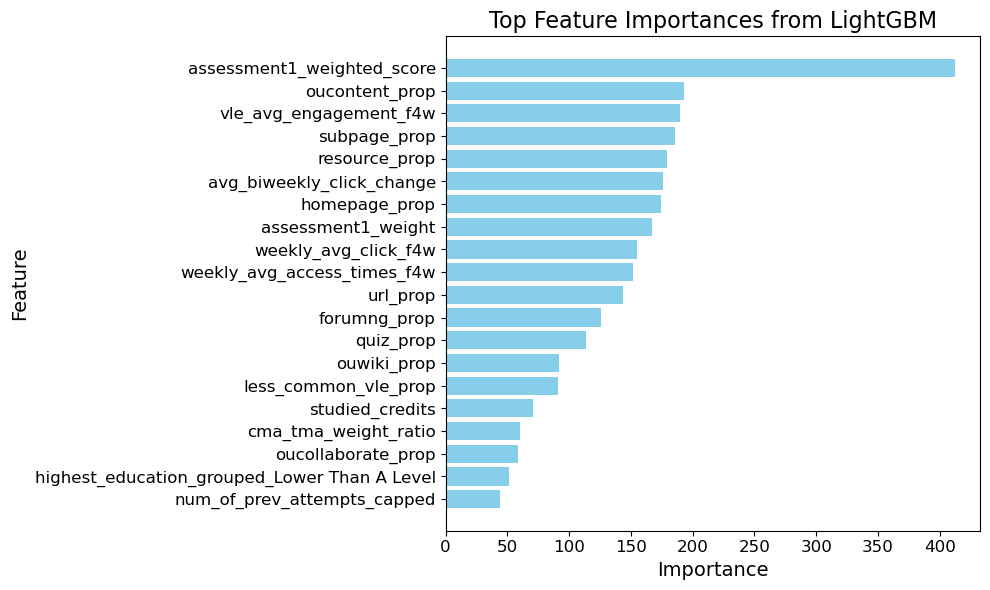

In [9]:
# Select the top features
top_features_lgb = importance_df.head(20)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features_lgb['Feature'], top_features_lgb['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top Feature Importances from LightGBM', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

In [10]:
lasso = LogisticRegression(penalty='l1', random_state=seed, solver='liblinear', class_weight='balanced')
lasso.fit(X_train_scaled, y_train)
lasso_coefficients = lasso.coef_.flatten()  # Ensure coefficients are 1-dimensional

# Combine feature names and coefficients into a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_coefficients
})

# Filter only features with non-zero coefficients
selected_feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Sort by absolute coefficient value to see importance ranking
selected_feature_importance = selected_feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

top_features_lasso = selected_feature_importance[:25]
top_features_lasso

Feature  Coefficient
21                    assessment1_weighted_score    -2.173175
20                            assessment1_weight     1.999957
6                         vle_avg_engagement_f4w    -0.375907
25                      imd_band_group_up to 50%     0.328783
14                                oucontent_prop    -0.288719
10                                  forumng_prop    -0.271906
23  highest_education_grouped_Lower Than A Level     0.252736
24                       imd_band_group_over 50%     0.191140
1                    num_of_prev_attempts_capped     0.167382
0                                         gender     0.150781
16                                     quiz_prop    -0.118956
27                                     cluster_2    -0.106129
2                                studied_credits     0.104712
11                                 homepage_prop    -0.094867
3                                     disability     0.087251
17                                 resource_prop    -0.063654
7                           weekly_avg_click_f4w    -0.052116
15                                   ouwiki_prop    -0.047096
18                                  subpage_prop    -0.041458
5                           cma_tma_weight_ratio    -0.037556
4                  frequent_activity_variety_f4w    -0.024524
19                                      url_prop     0.021874
26                                     cluster_1    -0.020700
13                            oucollaborate_prop    -0.020403
22    highest_education_grouped_HE Qualification    -0.006601

In [11]:
top_features_lgb['Feature'].values

array(['assessment1_weighted_score', 'oucontent_prop',
       'vle_avg_engagement_f4w', 'subpage_prop', 'resource_prop',
       'avg_biweekly_click_change', 'homepage_prop', 'assessment1_weight',
       'weekly_avg_click_f4w', 'weekly_avg_access_times_f4w', 'url_prop',
       'forumng_prop', 'quiz_prop', 'ouwiki_prop', 'less_common_vle_prop',
       'studied_credits', 'cma_tma_weight_ratio', 'oucollaborate_prop',
       'highest_education_grouped_Lower Than A Level',
       'num_of_prev_attempts_capped'], dtype=object)

In [12]:
top_features_lasso['Feature'].values

array(['assessment1_weighted_score', 'assessment1_weight',
       'vle_avg_engagement_f4w', 'imd_band_group_up to 50%',
       'oucontent_prop', 'forumng_prop',
       'highest_education_grouped_Lower Than A Level',
       'imd_band_group_over 50%', 'num_of_prev_attempts_capped', 'gender',
       'quiz_prop', 'cluster_2', 'studied_credits', 'homepage_prop',
       'disability', 'resource_prop', 'weekly_avg_click_f4w',
       'ouwiki_prop', 'subpage_prop', 'cma_tma_weight_ratio',
       'frequent_activity_variety_f4w', 'url_prop', 'cluster_1',
       'oucollaborate_prop', 'highest_education_grouped_HE Qualification'],
      dtype=object)

In [13]:
selected_features = top_features_lasso['Feature']
selected_features

21                      assessment1_weighted_score
20                              assessment1_weight
6                           vle_avg_engagement_f4w
25                        imd_band_group_up to 50%
14                                  oucontent_prop
10                                    forumng_prop
23    highest_education_grouped_Lower Than A Level
24                         imd_band_group_over 50%
1                      num_of_prev_attempts_capped
0                                           gender
16                                       quiz_prop
27                                       cluster_2
2                                  studied_credits
11                                   homepage_prop
3                                       disability
17                                   resource_prop
7                             weekly_avg_click_f4w
15                                     ouwiki_prop
18                                    subpage_prop
5                             c

In [14]:

models = {
    'Logistic Regression': LogisticRegression(random_state=seed, class_weight='balanced'), 
    'K-Nearest Neighbors': KNeighborsClassifier(), #weights='distance',
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(random_state=seed, class_weight='balanced'),
    'LightGBM': LGBMClassifier(random_state=seed, verbose=0, class_weight='balanced'),


}

# Scale the data with selected features 
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train[selected_features])
X_test_selected = scaler.transform(X_test[selected_features])

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)
      
    # Make predictions on the test set
    y_pred = model.predict(X_test_selected) 
    
    # Print the classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred)) # , target_names=label_encoder.classes_
    print("="*60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      3077
           1       0.66      0.65      0.66      2434

    accuracy                           0.70      5511
   macro avg       0.70      0.70      0.70      5511
weighted avg       0.70      0.70      0.70      5511

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.67      0.74      0.71      3077
           1       0.63      0.54      0.58      2434

    accuracy                           0.66      5511
   macro avg       0.65      0.64      0.64      5511
weighted avg       0.65      0.66      0.65      5511

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3077
           1       0.59      0.61      0.60      2434

    accuracy                           0.64      5511
   macro avg       0.64      0.64      0.64      5511
w

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier

# Prepare data for neural network

# Split the dataset into training and validation sets 
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=seed)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_nn)
class_weights = dict(enumerate(class_weights))  # Ensure it's a dictionary with 0 and 1 as keys
print("Class weights:", class_weights)

# Convert y_train_nn and y_val_nn to numpy arrays
y_train_nn_np = y_train_nn.to_numpy().reshape(-1, 1)
y_val_nn_np = y_val_nn.to_numpy().reshape(-1, 1)

Class weights: {0: 0.8948944376776289, 1: 1.1330805809021978}


In [16]:
import random
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
 

In [17]:
# Set the random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def build_nn_model():
    # Create the MLP model
    nn_model = Sequential()

    # Input layer and the first hidden layer
    nn_model.add(Dense(128, input_dim=X_train_selected.shape[1], activation='relu'))  
    nn_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

    # Second hidden layer
    nn_model.add(Dense(32, activation='relu'))
    nn_model.add(Dropout(0.1))

    # Output layer for binary classification (1 output neuron with sigmoid activation)
    nn_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), # 'adam', # 
                loss='binary_crossentropy', 
                metrics = ['accuracy']
                # metrics=[tf.keras.metrics.F1Score(name='f1_score')]
                # metrics=[tf.keras.metrics.Recall(name='recall')]
                )
    
    return nn_model

# Train the model
nn_model = build_nn_model()
history = nn_model.fit(X_train_nn, y_train_nn_np, epochs=20, batch_size=200, 
                    validation_data=(X_val_nn, y_val_nn_np),
                    class_weight=class_weights
                    )

# Evaluate the model on the validation set
val_loss, val_score = nn_model.evaluate(X_val_nn, y_val_nn_np)
print(f'Validation score: {val_score}')


Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6459 - loss: 0.6215 - val_accuracy: 0.6854 - val_loss: 0.5961
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.5885 - val_accuracy: 0.6845 - val_loss: 0.5879
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6971 - loss: 0.5800 - val_accuracy: 0.6829 - val_loss: 0.5846
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - loss: 0.5731 - val_accuracy: 0.6911 - val_loss: 0.5804
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - loss: 0.5690 - val_accuracy: 0.6881 - val_loss: 0.5805
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5672 - val_accuracy: 0.6890 - val_loss: 0.5800
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - loss: 0.5620 - val_accuracy: 0.6949 - val_loss: 0.5768
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 0.5632 - val_accuracy: 0.6922 - val_loss:

In [18]:
# Evaluate the model on the test set
# Make predictions on the test set (probabilities)
y_pred_prob = nn_model.predict(X_test_selected)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype("int32")  # 0.5 threshold for binary classification

# Evaluate the model

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Not At-Risk', 'At-Risk']))
report = classification_report(y_test, y_pred, target_names=['Not At-Risk', 'At-Risk'], output_dict=True)

# Print the classification report to show full numbers
print('Classification Report:')
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{label}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
    else:
        print(f"{label}: {metrics:.4f}")



173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
Classification Report:
              precision    recall  f1-score   support

 Not At-Risk       0.75      0.72      0.73      3077
     At-Risk       0.66      0.70      0.68      2434

    accuracy                           0.71      5511
   macro avg       0.71      0.71      0.71      5511
weighted avg       0.71      0.71      0.71      5511

Classification Report:
Not At-Risk:
  precision: 0.7490
  recall: 0.7186
  f1-score: 0.7335
  support: 3077.0000
At-Risk:
  precision: 0.6616
  recall: 0.6956
  f1-score: 0.6781
  support: 2434.0000
accuracy: 0.7084
macro avg:
  precision: 0.7053
  recall: 0.7071
  f1-score: 0.7058
  support: 5511.0000
weighted avg:
  precision: 0.7104
  recall: 0.7084
  f1-score: 0.7090
  support: 5511.0000


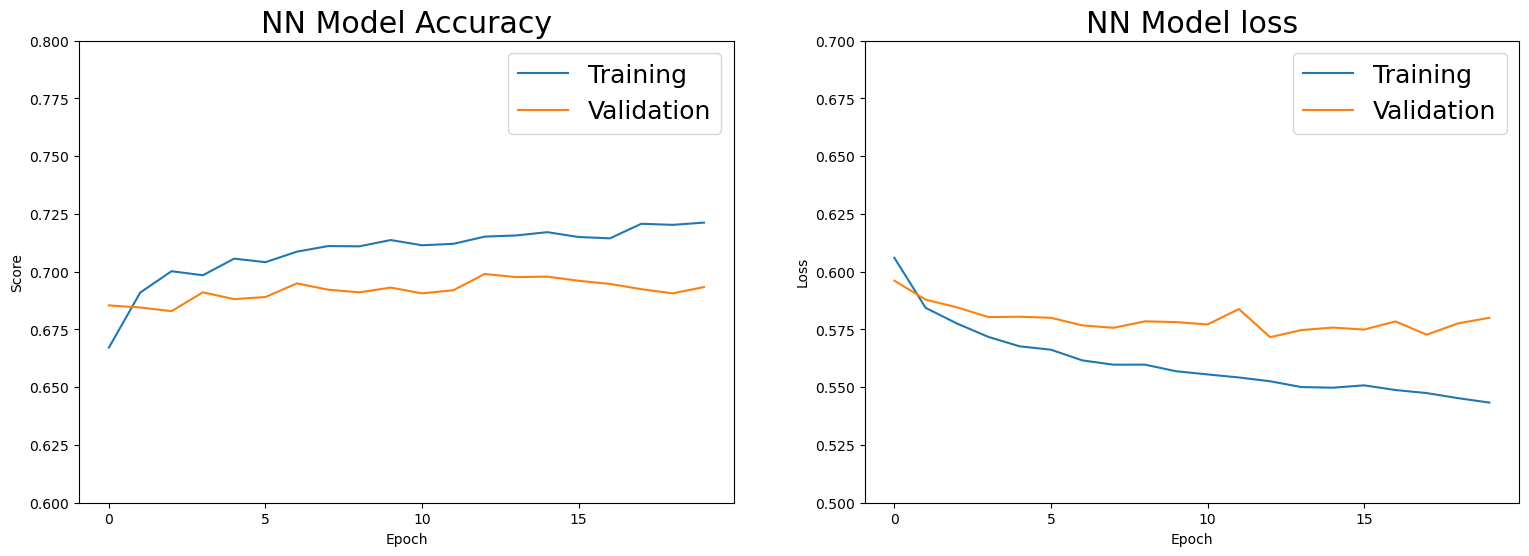

In [19]:
# Visualise the NN model's performance
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('NN Model Accuracy')
ax[0].set_ylabel('Score')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(0.6, 0.8)
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('NN Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(0.5, 0.7)
ax[1].legend()

plt.show()

## Hyperparameter tuning

In [20]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Define scoring metric
f1_class1_scoring = make_scorer(f1_score, pos_label=1) # F1 scores for class 1 (at-risk)
recall_class1_scoring = make_scorer(recall_score, pos_label=1)

# Define number of random parameter combinations to try
n_iter = 100


In [21]:
# Hyperparameter tuning for Neural Networks model

# Set the random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Define the model creation function outside the RandomizedSearchCV
def create_model(meta, hidden_layer_sizes=(128, 32), dropout_rates=(0.2, 0.1), learning_rate=0.005):
    n_features_in_ = meta["n_features_in_"]
    
    model = keras.Sequential([
        # First hidden layer
        keras.layers.Dense(
            hidden_layer_sizes[0], 
            activation='relu', 
            input_shape=(n_features_in_,)
        ),
        keras.layers.Dropout(dropout_rates[0]),
        
        # Second hidden layer
        keras.layers.Dense(
            hidden_layer_sizes[1], 
            activation='relu'
        ),
        keras.layers.Dropout(dropout_rates[1]),
        
        # Output layer
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        # metrics=['accuracy']
        metrics=[keras.metrics.F1Score(name='f1_score')]
        # metrics=[tf.keras.metrics.Recall(name='recall')]
    )
    
    return model

# Initialise the KerasClassifier
model = KerasClassifier(
    model=create_model,
    hidden_layer_sizes=(128, 32),
    dropout_rates=(0.2, 0.1),
    learning_rate=0.005,
    epochs=15,
    batch_size=200,
    verbose=0,
    random_state=seed
)

# Define parameter distributions for random search
nn_params = {
    'model__hidden_layer_sizes': [(128, 32), (64, 16)],
    'model__dropout_rates': [(0.2, 0.1), (0.3, 0.2)],
    'model__learning_rate': [0.005],
    'batch_size': [200, 300],
    'epochs': [12, 15]
}

# Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=nn_params,
    n_iter=10,
    cv=cv,
    scoring=f1_class1_scoring, # or 'f1'
    verbose=1,
    n_jobs=1,  # Set to 1 to avoid potential threading issues
    random_state=seed 
)

# Split the dataset into training and validation sets 
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_selected, 
    y_train, 
    test_size=0.2, 
    random_state=seed
)
# Convert to numpy arrays 
X_train_nn = np.array(X_train_nn)
y_train_nn = np.array(y_train_nn)

# Perform the random search
try:
    random_search_result = random_search.fit(X_train_nn, y_train_nn_np, class_weight=class_weights)

    # Print results
    print("\nBest parameters found:")
    for param, value in random_search_result.best_params_.items():
        print(f"{param}: {value}")
    print(f"\nBest score: {random_search_result.best_score_:.4f}")

    # Get the best model
    best_model = random_search_result.best_estimator_

    # Retrieve the best parameters for creating the model
    best_epochs = random_search_result.best_params_['epochs']
    best_batch_size = random_search_result.best_params_['batch_size']
    best_hidden_layer_sizes = random_search_result.best_params_['model__hidden_layer_sizes']
    best_dropout_rates = random_search_result.best_params_['model__dropout_rates']
    best_learning_rate = random_search_result.best_params_['model__learning_rate']


    # Measure the training time for best_nn with optimal parameters
    start_time = time.time()
    best_model.fit(X_train_nn, y_train_nn_np, epochs=best_epochs, batch_size=best_batch_size, class_weight=class_weights, verbose=0)
    end_time = time.time()
    
    # Store the training time
    nn_training_time = end_time - start_time

    # Evaluate on validation set
    val_score = best_model.score(X_val_nn, y_val_nn_np)
    print(f'Validation Score: {val_score:.4f}')

    # Make predictions 
    y_pred = best_model.predict(X_val_nn)

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Please check your data shapes:")
    print(f"X_train shape: {X_train_nn.shape}")
    print(f"y_train shape: {y_train_nn_np.shape}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters found:
model__learning_rate: 0.005
model__hidden_layer_sizes: (128, 32)
model__dropout_rates: (0.2, 0.1)
epochs: 12
batch_size: 200

Best score: 0.6515
Validation Score: 0.6920


In [22]:
# Create nn_params dictionary with best hyperparameters (used for final evaluation)
nn_params = {
    'hidden_layer_sizes': best_hidden_layer_sizes,
    'dropout_rates': best_dropout_rates,
    'learning_rate': best_learning_rate
}

# Evaluate the model on the test set
# Make predictions on the test set (probabilities)
y_pred_prob = best_model.predict(X_test_selected)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype("int32")  # 0.5 threshold for binary classification

# Evaluate the model

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Not At-Risk', 'At-Risk']))

# Print the classification report with full numbers
report = classification_report(y_test, y_pred, target_names=['Not At-Risk', 'At-Risk'], output_dict=True)

for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{label}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
    else:
        print(f"{label}: {metrics:.4f}")


Classification Report:
              precision    recall  f1-score   support

 Not At-Risk       0.76      0.70      0.73      3077
     At-Risk       0.65      0.72      0.68      2434

    accuracy                           0.71      5511
   macro avg       0.71      0.71      0.71      5511
weighted avg       0.71      0.71      0.71      5511

Not At-Risk:
  precision: 0.7591
  recall: 0.6955
  f1-score: 0.7259
  support: 3077.0000
At-Risk:
  precision: 0.6519
  recall: 0.7210
  f1-score: 0.6847
  support: 2434.0000
accuracy: 0.7068
macro avg:
  precision: 0.7055
  recall: 0.7083
  f1-score: 0.7053
  support: 5511.0000
weighted avg:
  precision: 0.7118
  recall: 0.7068
  f1-score: 0.7077
  support: 5511.0000


In [23]:
from tensorflow.keras.models import load_model
# Save the trained model to a file
best_model.model_.save('best_nn_model01.keras')

'''
This saves the model's architecture, weights, and optimizer state, allowing to reload the exact trained model,
without needing to retrain it, and can avoid potential issues with random initializations when accessing the model later.
'''


"\nThis saves the model's architecture, weights, and optimizer state, allowing to reload the exact trained model,\nwithout needing to retrain it, and can avoid potential issues with random initializations when accessing the model later.\n"

In [24]:

# Create a copy of the best NN model to be used for evaluation
best_nn = load_model('best_nn_model01.keras')

# Make predictions on the test set (probabilities) using best_nn
y_pred_prob_nn = best_nn.predict(X_test_selected) 

# Convert probabilities to binary class labels (0 or 1) using a threshold of 0.5
y_pred_nn = (y_pred_prob_nn >= 0.5).astype("int32")

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


In [25]:
best_nn.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,469 (87.77 KB)

 Trainable params: 7,489 (29.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,980 (58.52 KB)

In [26]:
# Use RandomizedSearchCV function for hyperparameter tuning 
def random_search_cv(model, params, predictors, target, n_iter=n_iter, scoring=f1_class1_scoring, cv=cv, random_state=seed):
    # Initialise RandomizedSearchCV
    rnd_search = RandomizedSearchCV(estimator=model, 
                                    param_distributions=params, 
                                    n_iter=n_iter, 
                                    scoring=scoring, 
                                    cv=cv,                                     
                                    random_state=random_state,
                                    verbose=1,  
                                    n_jobs=1)
    # Fit the model
    rnd_mod = rnd_search.fit(predictors, target)

    return [rnd_mod, rnd_mod.best_estimator_, rnd_mod.best_params_, rnd_mod.best_score_, rnd_mod.cv_results_]

In [27]:
# Define Logistic Regression parameters
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400, 500, 700, 1000],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    # 'penalty': ['l1', 'l2']
}

# Initialise Logistic Regression model
lr_model = LogisticRegression(random_state=seed, solver='liblinear', class_weight='balanced')

# Perform RandomizedSearchCV for Logistic Regression
lr_search = random_search_cv(lr_model, lr_params, X_train_selected, y_train)

# Get the best parameters and best score
print("Best parameters for Logistic Regression:", lr_search[2])
print("Best score for Logistic Regression:", lr_search[3])


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Logistic Regression: {'tol': 0.01, 'max_iter': 1000, 'C': 0.1}
Best score for Logistic Regression: 0.6593706482646583


In [28]:
# Define the parameter grid for Decision Tree
dt_params = {
    'max_depth': [None, 8, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=seed, class_weight='balanced')

# Perform RandomizedSearchCV for Decision Tree
dt_search = random_search_cv(dt_model, dt_params, X_train_selected, y_train, n_iter=200)

# Get the best parameters and best score
print("Best parameters for Decision Tree:", dt_search[2])
print("Best score for Decision Tree:", dt_search[3])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for Decision Tree: {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best score for Decision Tree: 0.6409576608355281


In [29]:
lgbm_params = {
    'num_leaves': [20, 31, 50, 100],
    'max_depth': [-1, 5, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [80, 100, 200, 500, 1000],
}

lgbm_model = LGBMClassifier(random_state=seed, verbose=0, class_weight='balanced')

# Perform RandomizedSearchCV for LightGBM
lgbm_search = random_search_cv(lgbm_model, lgbm_params, X_train_selected, y_train, n_iter=200)

# Get the best parameters and best score
print("Best parameters for LightGBM:", lgbm_search[2])
print("Best score for LightGBM:", lgbm_search[3])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [30]:
def show_summary_report(actual, prediction_prob):
    # Ensure that `prediction_prob` is probability values for AUC and PR curve
    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    # if prediction.dtype.name == 'object':
    #     prediction = prediction.astype(float)

    # prediction_int = np.round(prediction)
    # Convert probabilities to binary class labels
    prediction_int = (prediction_prob >= 0.5).astype(int)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    f1_score_ = f1_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction_prob)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('F1 Score : %.4f (Precision x Recall) x 2 / (Precision + Recall)                     Best: 1, Worst: 0' % f1_score_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    con_mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_prob)
    # average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction_prob)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    # sns.heatmap(con_mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])
    plot_confusion_matrix(conf_mat=con_mat,
                            show_absolute=True,
                            show_normed=True,
                            colorbar=False,
                            axis = ax[0]
                            )
    ax[0].set_title('CM [0_Not At-Risk, 1_At-Risk]')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-Class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, f1_score_, roc_auc_)

***********************
* Logistic Regression *
***********************
Accuracy : 0.6986 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6599 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6553 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1 Score : 0.6576 (Precision x Recall) x 2 / (Precision + Recall)                     Best: 1, Worst: 0
ROC AUC  : 0.7712                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


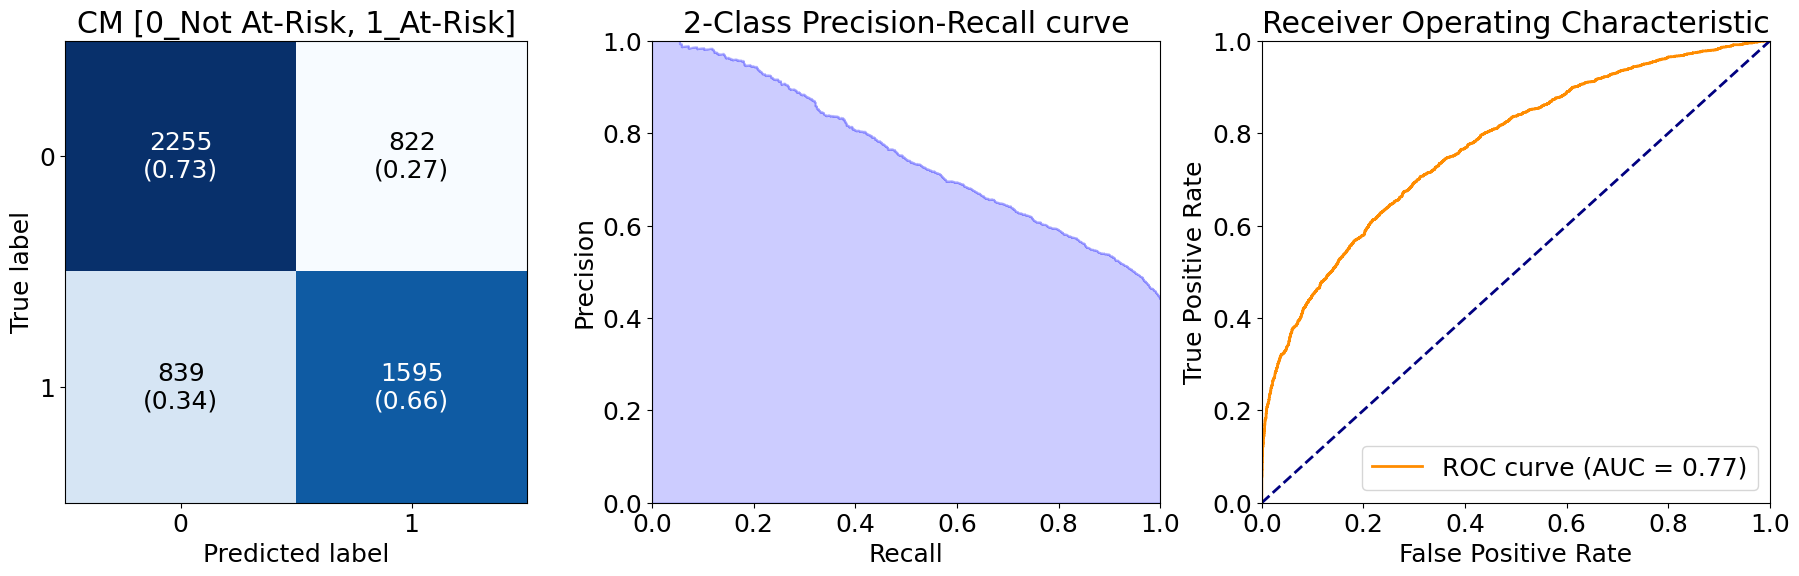


*****************
* Decision Tree *
*****************
Accuracy : 0.6714 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6118 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7005 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1 Score : 0.6531 (Precision x Recall) x 2 / (Precision + Recall)                     Best: 1, Worst: 0
ROC AUC  : 0.7361                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


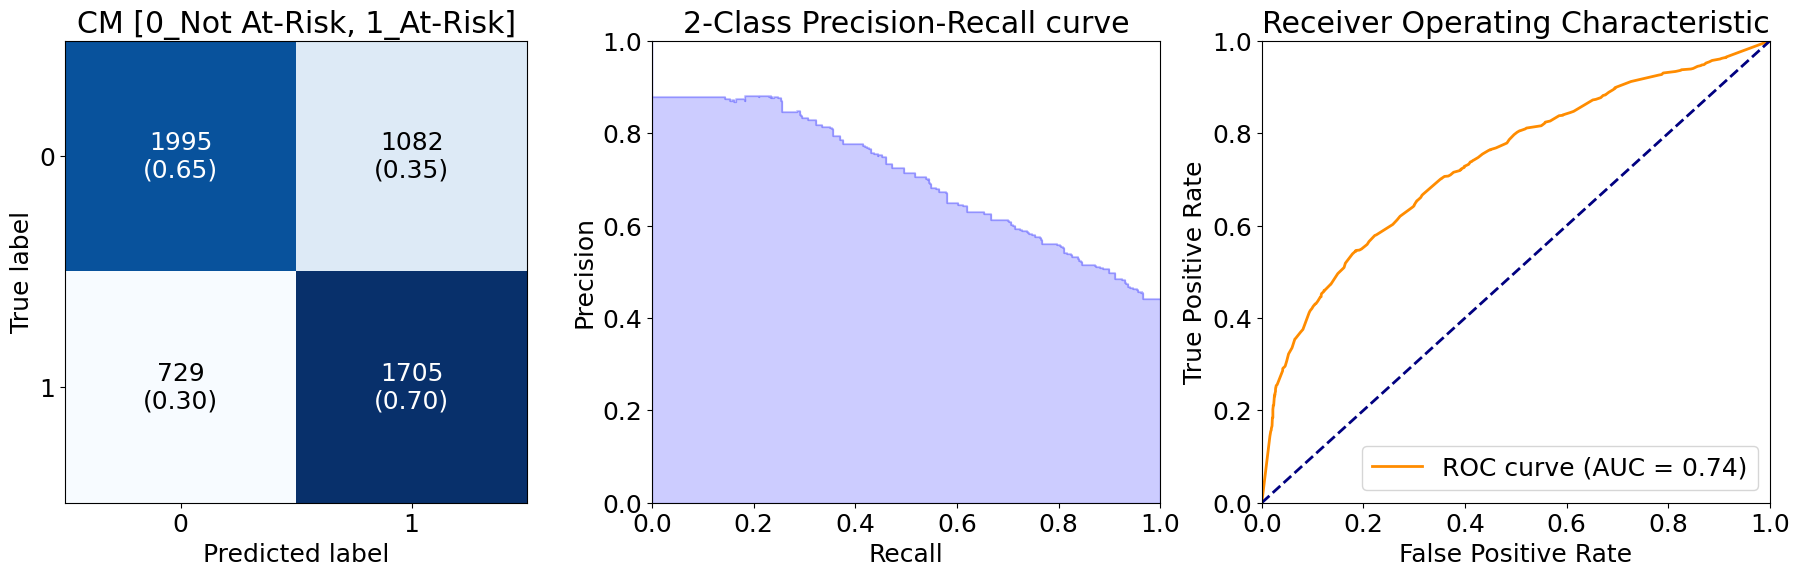


************
* LightGBM *
************
Accuracy : 0.7216 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6936 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6623 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1 Score : 0.6776 (Precision x Recall) x 2 / (Precision + Recall)                     Best: 1, Worst: 0
ROC AUC  : 0.7907                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


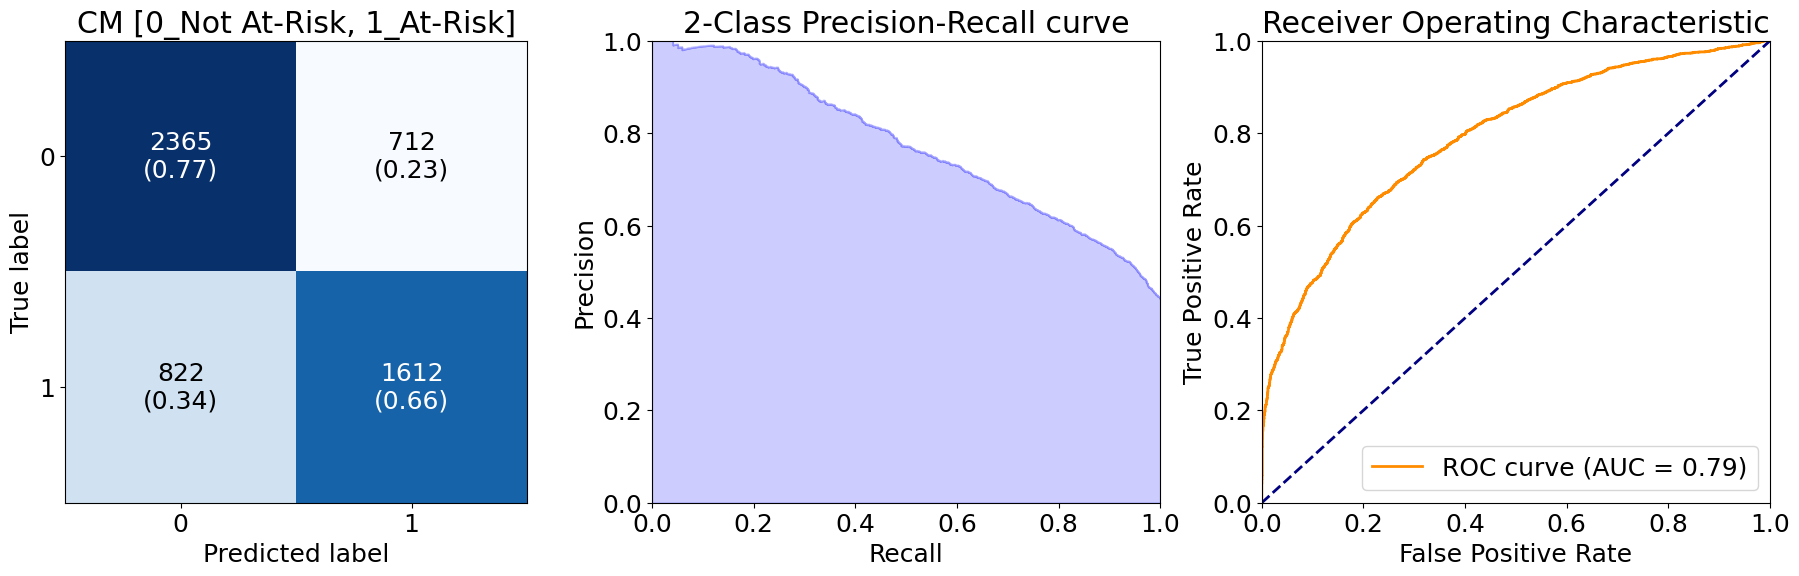


******************
* Neural Network *
******************
Accuracy : 0.7068 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6519 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7210 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
F1 Score : 0.6847 (Precision x Recall) x 2 / (Precision + Recall)                     Best: 1, Worst: 0
ROC AUC  : 0.7841                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


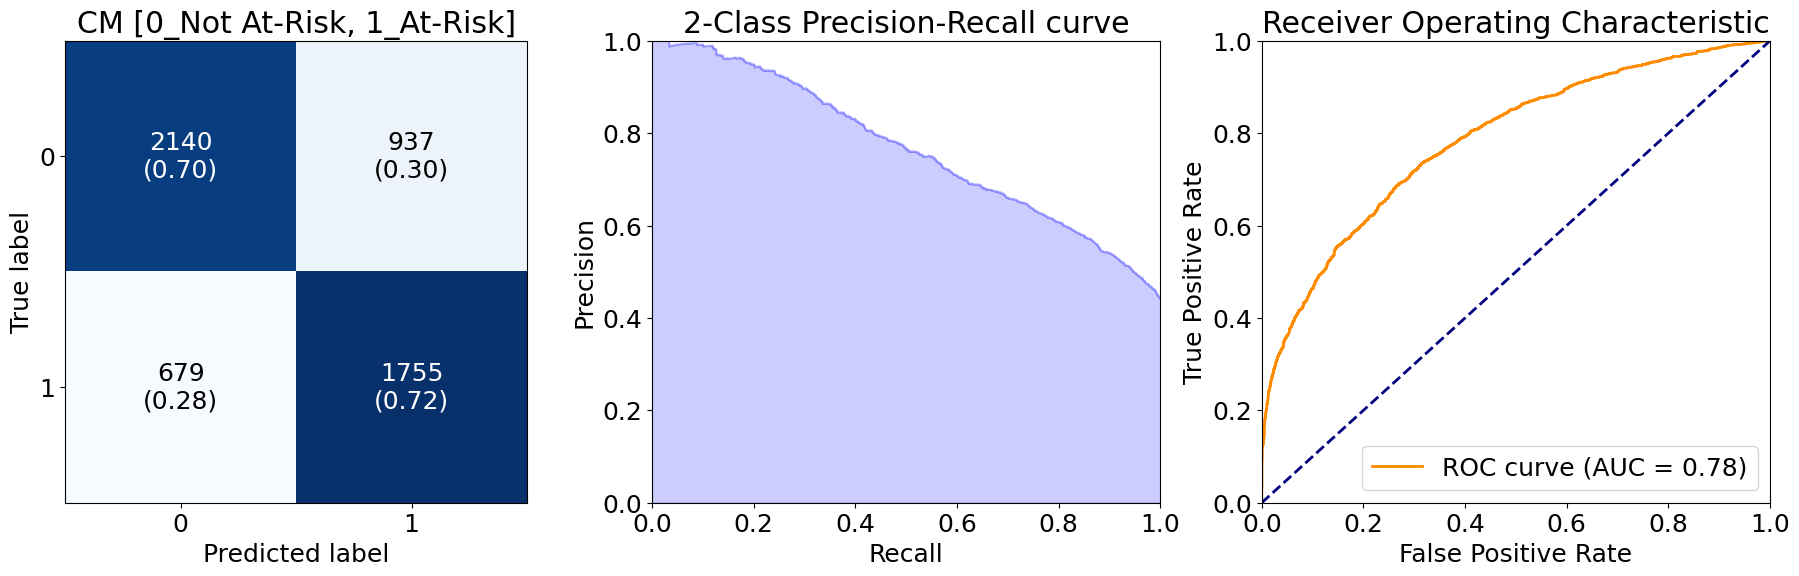

In [31]:
import time
np.random.seed(seed), tf.random.set_seed(seed), random.seed(seed)
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Training Time (s)'])

# Best models from hyperparameter tuning
best_lr = lr_search[1]
best_dt = dt_search[1]
best_lgbm = lgbm_search[1]

models = ['Logistic Regression', 'Decision Tree', 'LightGBM', 'Neural Network']
for i, m in enumerate([best_lr, best_dt, best_lgbm, best_nn]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))

    # Measure Training Time for each model
    if models[i] != 'Neural Network': # For non-NN models
        start_time = time.time()
        m.fit(X_train_selected, y_train)  
        end_time = time.time()
        training_time = end_time - start_time
    else:
        # Use the stored training time for NN, as best_nn may yield a different outcome if retrained (due to randomness)
        training_time = nn_training_time

    # Make predictions using the fitted model
    if models[i] == 'Neural Network':
        predictions = y_pred_prob_nn  # Use stored probabilities for best_nn
    elif hasattr(m, 'predict_proba'):
        predictions = m.predict_proba(X_test_selected)[:, 1]
    else:
        predictions = m.predict(X_test_selected) # For models that don't have predict_proba
    # show the report
    accuracy_, precision_, recall_, f1_score_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i],
                      'Accuracy': accuracy_,
                      'Precision': precision_,
                      'Recall': recall_,
                      'F1 Score': f1_score_,
                      'ROC_AUC': roc_auc_,
                      'Training Time (s)': training_time
                      }
    print()

In [32]:
# Display the results DataFrame according to the F1 Score
results_sort = results.sort_values(by='F1 Score', ascending=False)
# Round the DataFrame to 3 decimal places
results_sort = results_sort.round(3)
results_sort

Model  Accuracy  Precision  Recall  F1 Score  ROC_AUC  \
3       Neural Network     0.707      0.652   0.721     0.685    0.784   
2             LightGBM     0.722      0.694   0.662     0.678    0.791   
0  Logistic Regression     0.699      0.660   0.655     0.658    0.771   
1        Decision Tree     0.671      0.612   0.700     0.653    0.736   

   Training Time (s)  
3              3.718  
2              0.864  
0              0.059  
1              0.213

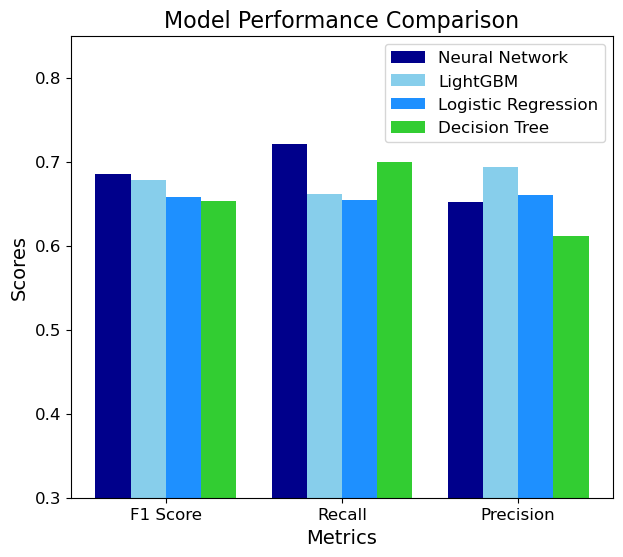

In [47]:
# Extract scores from the DataFrame for each model 
models = results_sort['Model'].values  # Model names
f1_scores = results_sort['F1 Score'].values  # F1 Scores
recall_scores = results_sort['Recall'].values  # Recall Scores
precision_scores = results_sort['Precision'].values  # Precision Scores

# Define bar width and positions
bar_width = 0.2
x = np.arange(3)  # number of metrics

# Define custom colours for each model
model_colors = {
    'Neural Network': 'darkblue',
    'LightGBM': 'skyblue',
    'Logistic Regression': 'dodgerblue',
    'Decision Tree': 'limegreen'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Plot the scores
for i, model in enumerate(models):
    ax.bar(x + i * bar_width, [f1_scores[i], recall_scores[i], precision_scores[i]], bar_width, label=model, color=model_colors[model]) #

# Set labels, title, and ticks
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(['F1 Score', 'Recall', 'Precision'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0.3, 0.85)


# Show plot
plt.show()

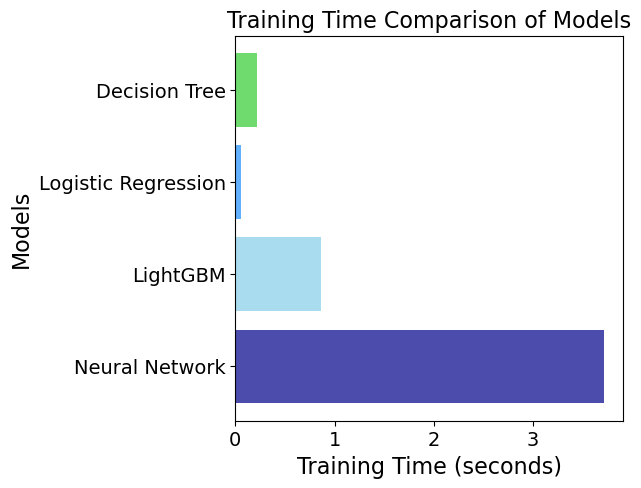

In [34]:
# models = ['Neural Network', 'LightGBM', 'LR (LASSO)', 'Decision Tree']

# Create the horizontal bar chart for training times
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the training times
ax.barh(results_sort['Model'], results_sort['Training Time (s)'], alpha=0.7, color=model_colors.values())

# Set labels and title
ax.set_xlabel('Training Time (seconds)', fontsize=16)
ax.set_ylabel('Models', fontsize=16)
ax.set_title('Training Time Comparison of Models', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Display the plot
plt.show()


### Model Evaluation Summary

Given the priorities of **F1 Score** for accurately detecting at-risk students, along with considerations for **training time**, **interpretability**, and **model transparency**, the models are assessed as follows:

| Model           | Interpretability & Transparency |
|-----------------|---------------------------------|
| Logistic Regression    | High - straightforward and explainable coefficients |
| Decision Tree   | High - interpretable structure, clear decision paths |
| LightGBM        | Moderate - complex, though feature importances help |
| Neural Network  | Low - less interpretable without additional tools |

### Recommendation based on the result on test data:
- **Neural Network** leads in **F1 Score** and **recall**, making it the best choice for accurately identifying at-risk students. However, it requires the longest **training time** and lacks interpretability.
- **LightGBM** provides a strong balance of **performance** and **training time** while maintaining moderate interpretability, making it a practical alternative.
- **Logistic Regression** and **Decision Tree** offer the best **interpretability** but perform slightly lower on F1.

**Recommendation**: Use **Neural Network** if F1 is the top priority and interpretability can be managed with additional tools. For a balance of accuracy, efficiency, and interpretability, **LightGBM** is also a strong candidate.

### Ranking of features and their relationship with the target prediction

- **LightGBM**: It provides a straightforward ranking of feature importance, which highlights the impact each feature has on the prediction. 
  
- **Logistic Regression**: The coefficients in Logistic Regression offer insight into the direction (positive or negative) and strength of each feature’s relationship with the target, making it highly interpretable for stakeholders. Additionally, the linear nature of LR allows for a transparent, easily understandable feature ranking.

These two models combine interpretability with predictive insight, making them ideal for presenting the importance and influence of features.

In [35]:
best_lgbm.fit(X_train_selected, y_train)

# Get feature importance
importance = best_lgbm.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train[selected_features].columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importances for LightGBM:")
importance_df

Feature Importances for LightGBM:


Feature  Importance
0                     assessment1_weighted_score        3391
1                             assessment1_weight        1514
2                         vle_avg_engagement_f4w         995
4                                 oucontent_prop         979
18                                  subpage_prop         867
16                          weekly_avg_click_f4w         842
13                                 homepage_prop         688
15                                 resource_prop         681
5                                   forumng_prop         607
17                                   ouwiki_prop         537
12                               studied_credits         520
21                                      url_prop         475
10                                     quiz_prop         473
6   highest_education_grouped_Lower Than A Level         448
19                          cma_tma_weight_ratio         410
8                    num_of_prev_attempts_capped         377
3                       imd_band_group_up to 50%         362
14                                    disability         178
23                            oucollaborate_prop         174
7                        imd_band_group_over 50%         135
20                 frequent_activity_variety_f4w         129
9                                         gender         118
24    highest_education_grouped_HE Qualification          42
11                                     cluster_2          41
22                                     cluster_1          17

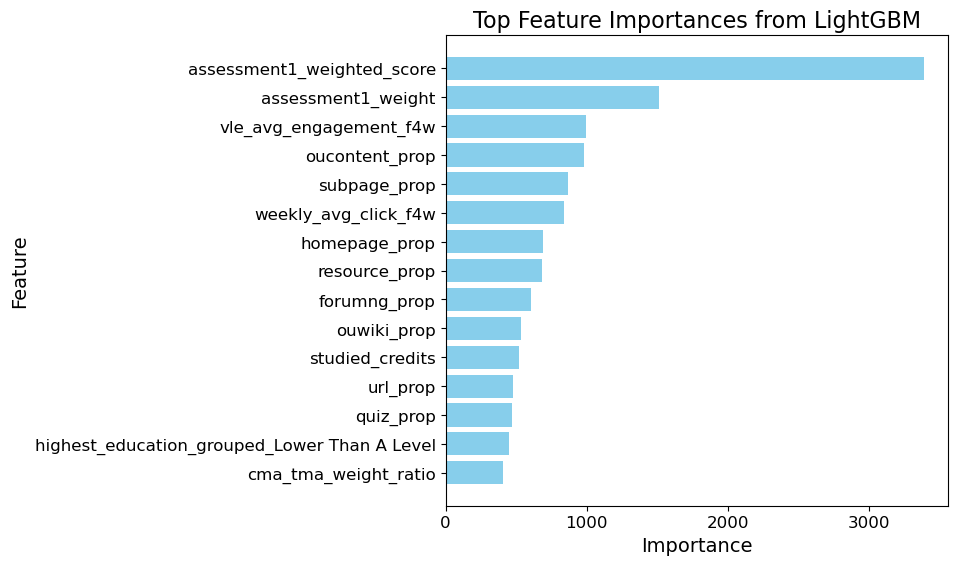

In [36]:
# Select the top features
top_features_lgbm = importance_df.head(15)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features_lgbm['Feature'], top_features_lgbm['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top Feature Importances from LightGBM', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

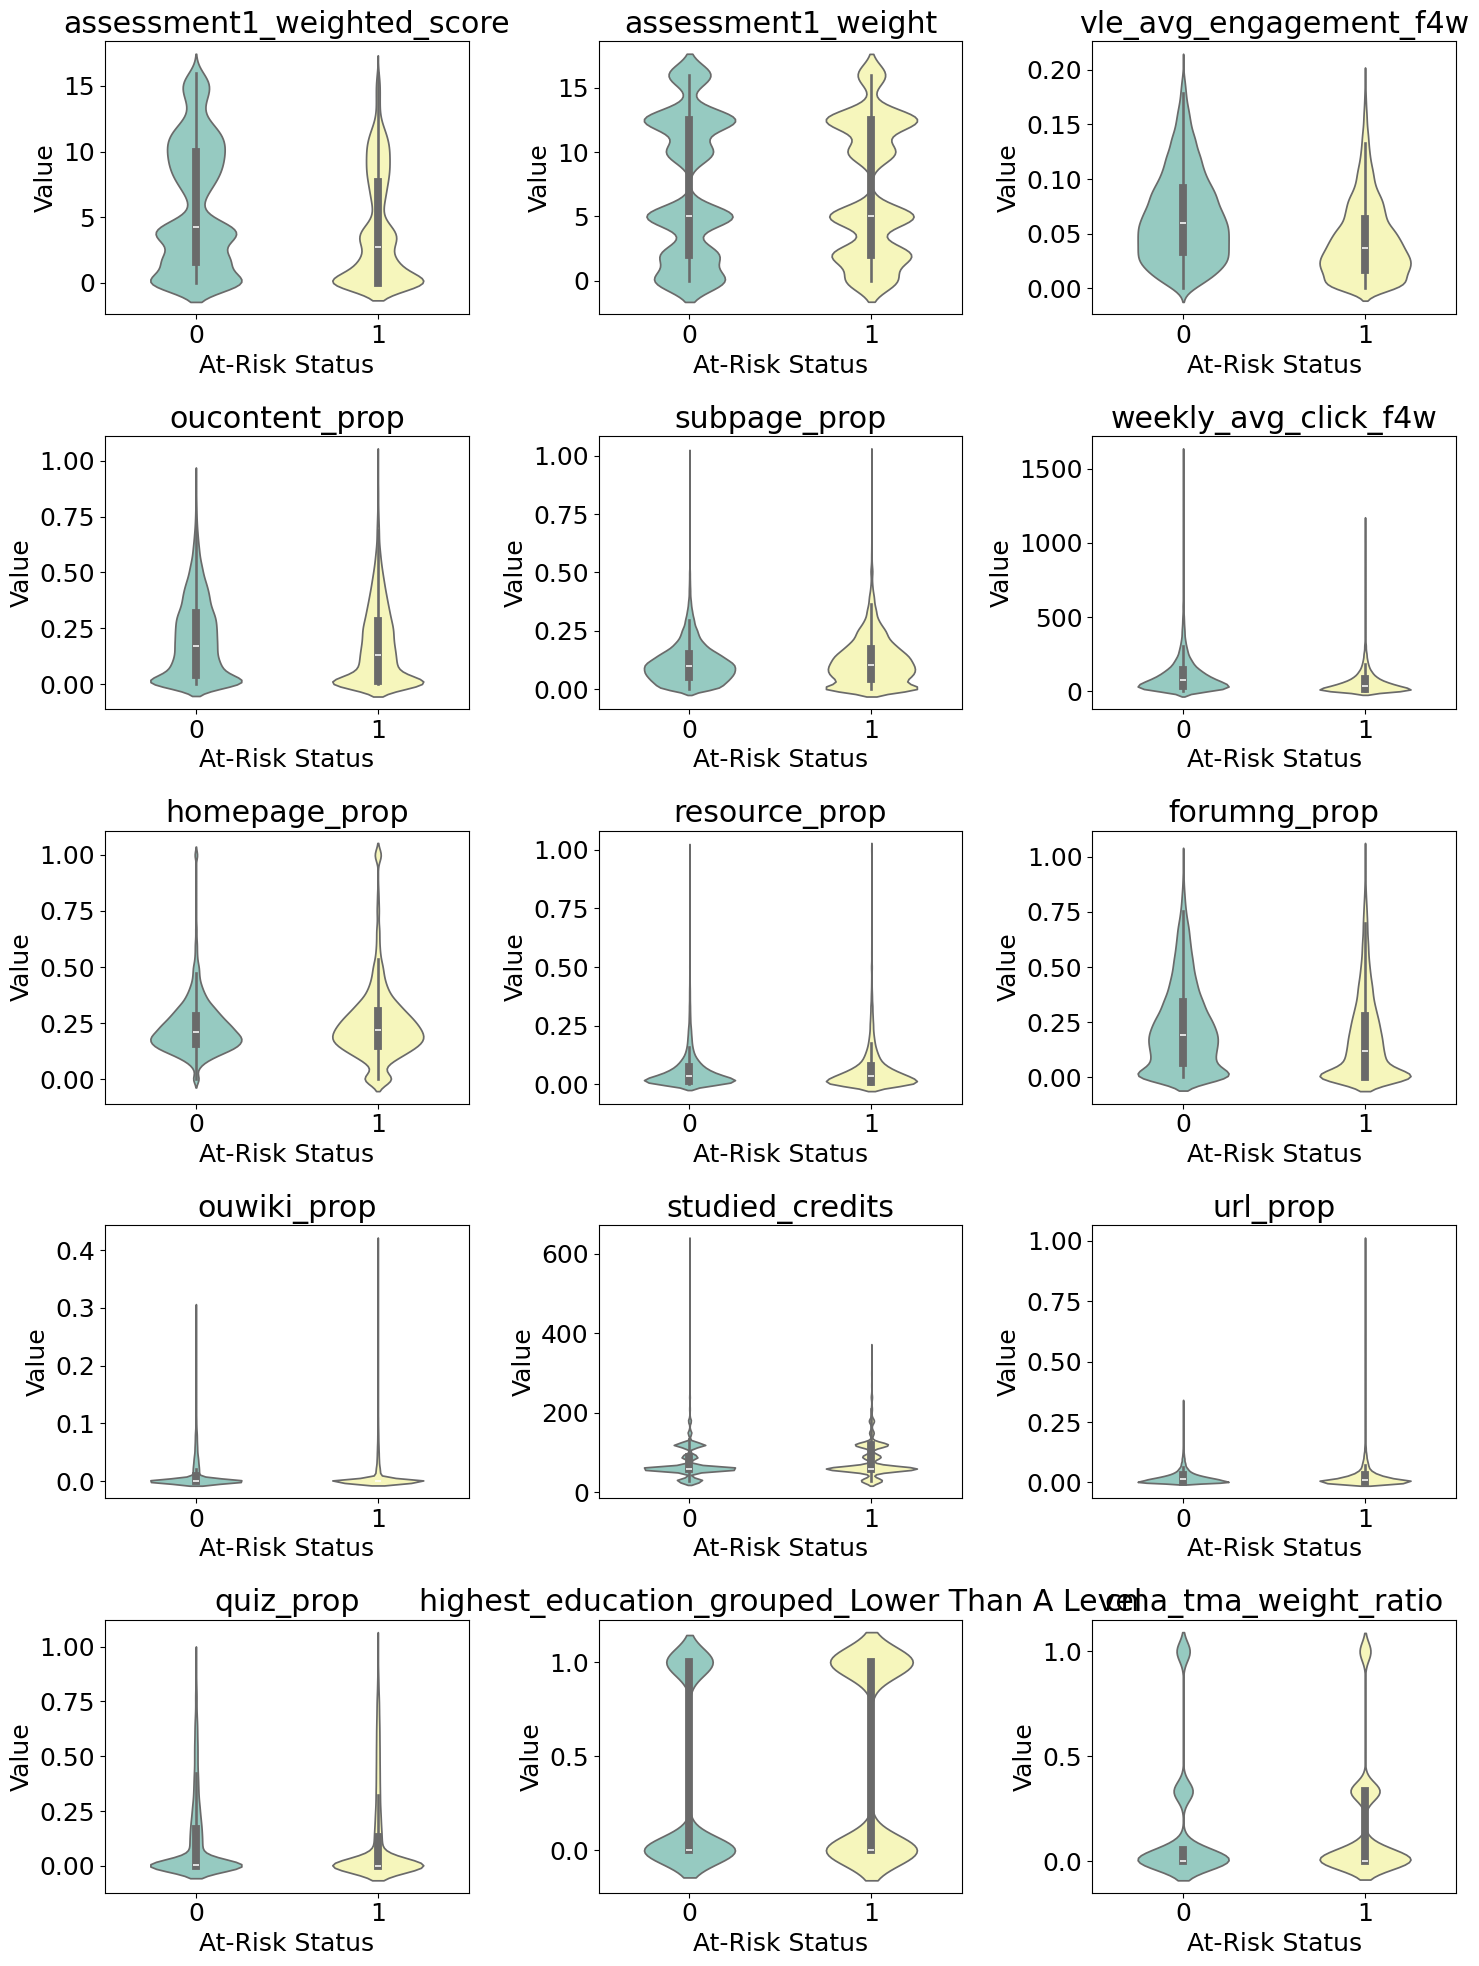

In [37]:
# Do box plots for the top features (against the target variable)

# Select the top features for plotting
top_features_lgbm = importance_df.head(15)['Feature']

# Ensure X_train_selected is a DataFrame
# X_train_selected_df = pd.DataFrame(X_train_selected, columns=X_train[selected_features].columns)

# Combine X_train's selected features and y_train into one DataFrame for Seaborn
plot_data = X_train[selected_features].copy()
plot_data['At-Risk'] = y_train.values  # Add the target variable as a new column


# Set up the subplot grid 
num_features = len(top_features_lgbm)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot density plots for each top feature against the target
for i, feature in enumerate(top_features_lgbm):
    # plot
    sns.violinplot(data=plot_data, x='At-Risk',  y=feature, fill=True, ax=axes[i], palette='Set3', width=0.5)
    
    # Set title and labels
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('At-Risk Status')
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### Comments:
It could be helpful to note that, while `assessment1_weight` does not show an obvious difference in the at-risk vs. not-at-risk groups on its own, it contributes to prediction accuracy by interacting with other features in ways that may be complex or non-linear.

##### Detailed actionable insights based on the top 15 features:

**Course/Assessment-Related Features**:

* `assessment1_weighted_score` and `assessment1_weight` are the most influential, indicating that early assessment results are crucial in predicting student success. This suggests a need for close monitoring of students who perform poorly in early assessments, especially in those with significant weight. These students could be prioritised for academic support to help them catch up.

* `cma_tma_weight_ratio`  which represents the balance between computer-marked assessment (CMA) weight and tutor-marked assessment (TMA) weight, can help advisors identify courses where a high reliance on computer-marked assessments may impact student outcomes, potentially indicating areas where more personalised feedback from tutors could be beneficial..

**VLE Engagement (Online Activities):**

* Features like `vle_avg_engagement_f4w` (average engagement within the first four weeks), `oucontent_prop`, `subpage_prop`, `homepage_prop`, and `forumng_prop` indicate the importance of specific engagement patterns in the virtual learning environment. For instance, a high proportion of oucontent and forumng (forums) interactions is associated with positive outcomes, suggesting that students benefit from actively engaging with course content and participating in discussions. Advisors might encourage students to engage with these resources early to enhance their learning experience.

* `weekly_avg_click_f4w` and `resource_prop` also point to general online activity and resource engagement as predictive of success. Regular engagement across different VLE activities should be encouraged as part of a balanced online study routine.

**Student Demographic:**

* `studied_credits` indicates that course load can influence student performance. Students with heavier or lighter than average credit loads may require tailored support to manage their workload effectively.

* `highest_education_grouped_Lower Than A Level` suggests that students with lower education backgrounds might face additional challenges. Advisors could consider offering additional resources or academic assistance for students identified in this demographic category.

In [38]:
best_lr.fit(X_train_selected, y_train)
lr_coefficients = best_lr.coef_.flatten()  # Ensure coefficients are 1-dimensional

# Combine feature names and coefficients into a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    'Feature': X_train[selected_features].columns,
    'Coefficient': lr_coefficients
})

# Filter only features with non-zero coefficients
selected_feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Sort by absolute coefficient value to see importance ranking
selected_feature_importance = selected_feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

selected_feature_importance

Feature  Coefficient
0                     assessment1_weighted_score    -2.036748
1                             assessment1_weight     1.861790
2                         vle_avg_engagement_f4w    -0.374156
3                       imd_band_group_up to 50%     0.320636
4                                 oucontent_prop    -0.288409
5                                   forumng_prop    -0.271536
6   highest_education_grouped_Lower Than A Level     0.252945
7                        imd_band_group_over 50%     0.182016
8                    num_of_prev_attempts_capped     0.166430
9                                         gender     0.152714
10                                     quiz_prop    -0.121195
11                                     cluster_2    -0.107283
12                               studied_credits     0.105705
13                                 homepage_prop    -0.095850
14                                    disability     0.087774
15                                 resource_prop    -0.065162
16                          weekly_avg_click_f4w    -0.051561
19                          cma_tma_weight_ratio    -0.045861
17                                   ouwiki_prop    -0.044913
18                                  subpage_prop    -0.037232
20                 frequent_activity_variety_f4w    -0.031085
22                                     cluster_1    -0.023309
21                                      url_prop     0.022061
23                            oucollaborate_prop    -0.020023
24    highest_education_grouped_HE Qualification    -0.007956

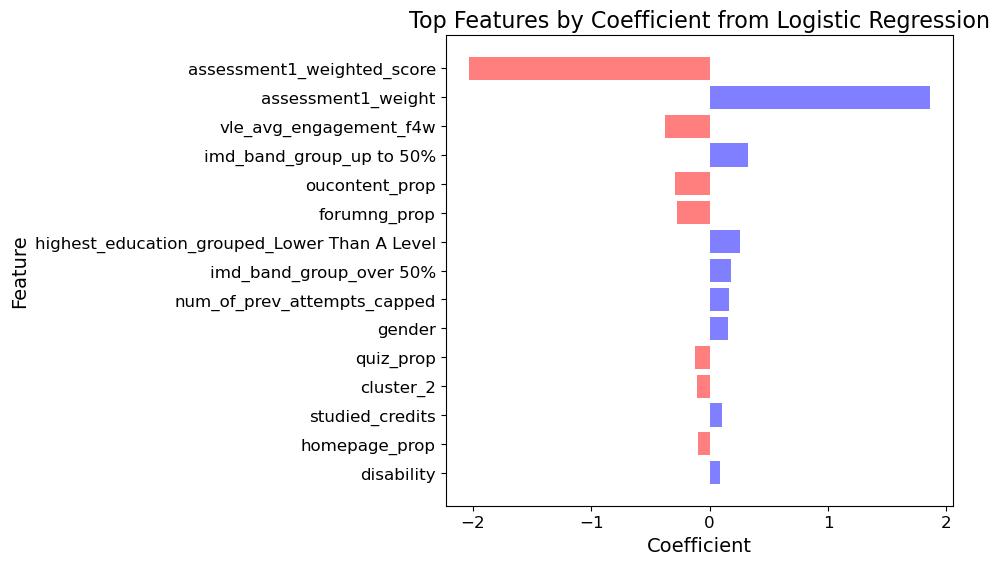

In [39]:
# Select the top features
top_features_lr = selected_feature_importance.head(15)

# Define colors: red for negative values, blue for positive values
colors = ['red' if coef < 0 else 'blue' for coef in top_features_lr['Coefficient']]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features_lr['Feature'], top_features_lr['Coefficient'], color=colors, alpha=0.5)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top Features by Coefficient from Logistic Regression', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

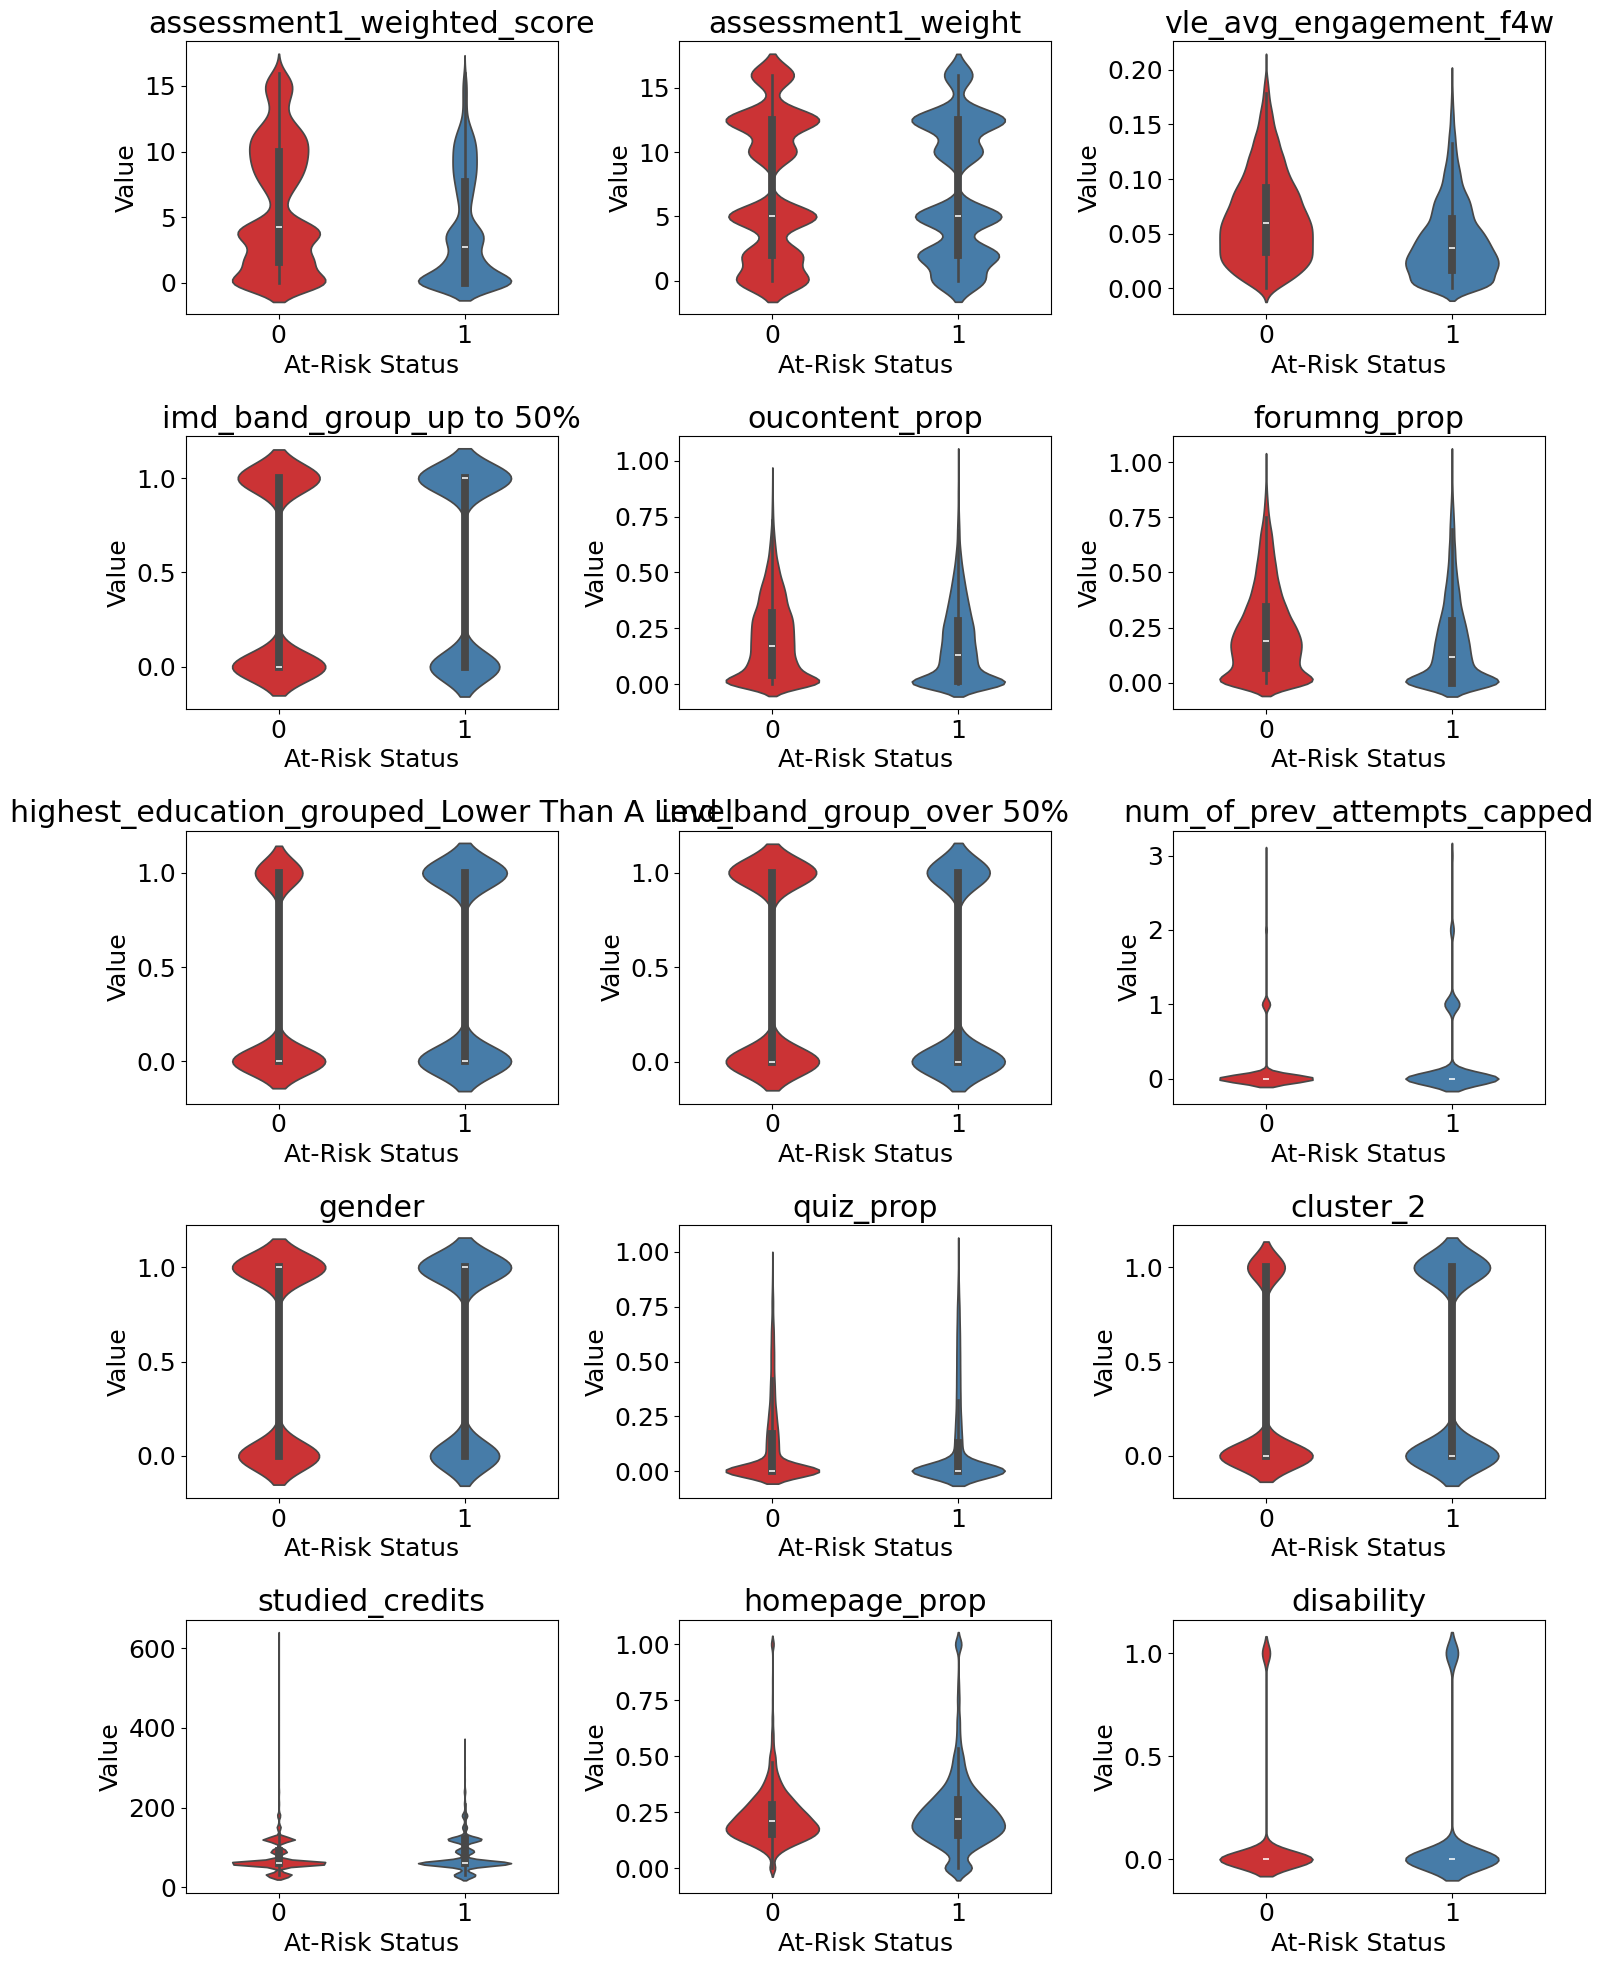

In [40]:
# Do box plots for the top features (against the target variable)


# Combine X_train's selected features and y_train into one DataFrame for Seaborn
# plot_data = X_train[selected_features].copy()
# plot_data['At-Risk'] = y_train.values  # Add the target variable as a new column


# Set up the subplot grid 
num_features = len(top_features_lr)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot density plots for each top feature against the target
for i, feature in enumerate(top_features_lr['Feature']):
    # plot
    sns.violinplot(data=plot_data, x='At-Risk',  y=feature, fill=True, ax=axes[i], palette='Set1',width=0.5)
    
    # Set title and labels
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('At-Risk Status')
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

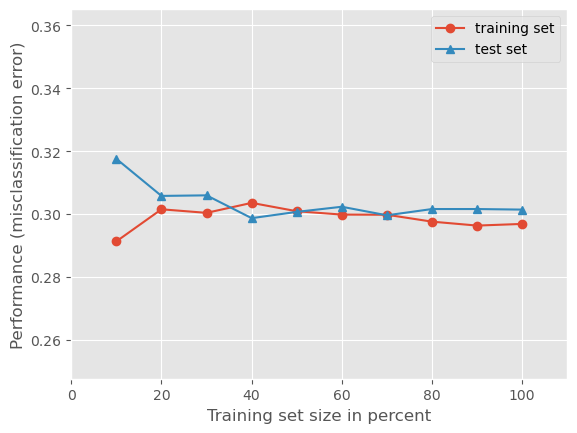

In [41]:
from mlxtend.plotting import plot_learning_curves
plt.figure()
plot_learning_curves(X_train_selected, y_train, X_test_selected, y_test, best_lr, print_model=False, style='ggplot')
plt.show()

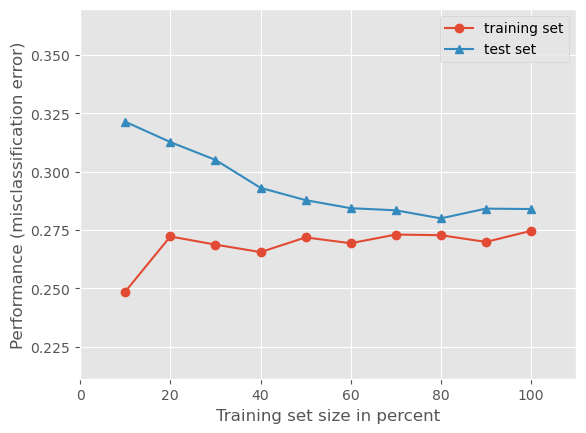

In [42]:
# Create the KerasClassifier with dimension suitable for plot_learning_curves
np.random.seed(seed), tf.random.set_seed(seed), random.seed(seed)

best_nn_lc = KerasClassifier(
    build_fn=create_model,  # Note: `create_model` should accept `meta` as in the tuning step
    hidden_layer_sizes=best_hidden_layer_sizes,
    dropout_rates=best_dropout_rates,
    learning_rate=best_learning_rate,
    epochs=best_epochs,          # Best number of epochs
    batch_size=best_batch_size,   # Best batch size
    verbose=0,
    random_state=seed,
    class_weight=class_weights
)

plt.figure()
plot_learning_curves(X_train_selected, y_train, X_test_selected, y_test, best_nn_lc, print_model=False, style='ggplot') 
plt.show()

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


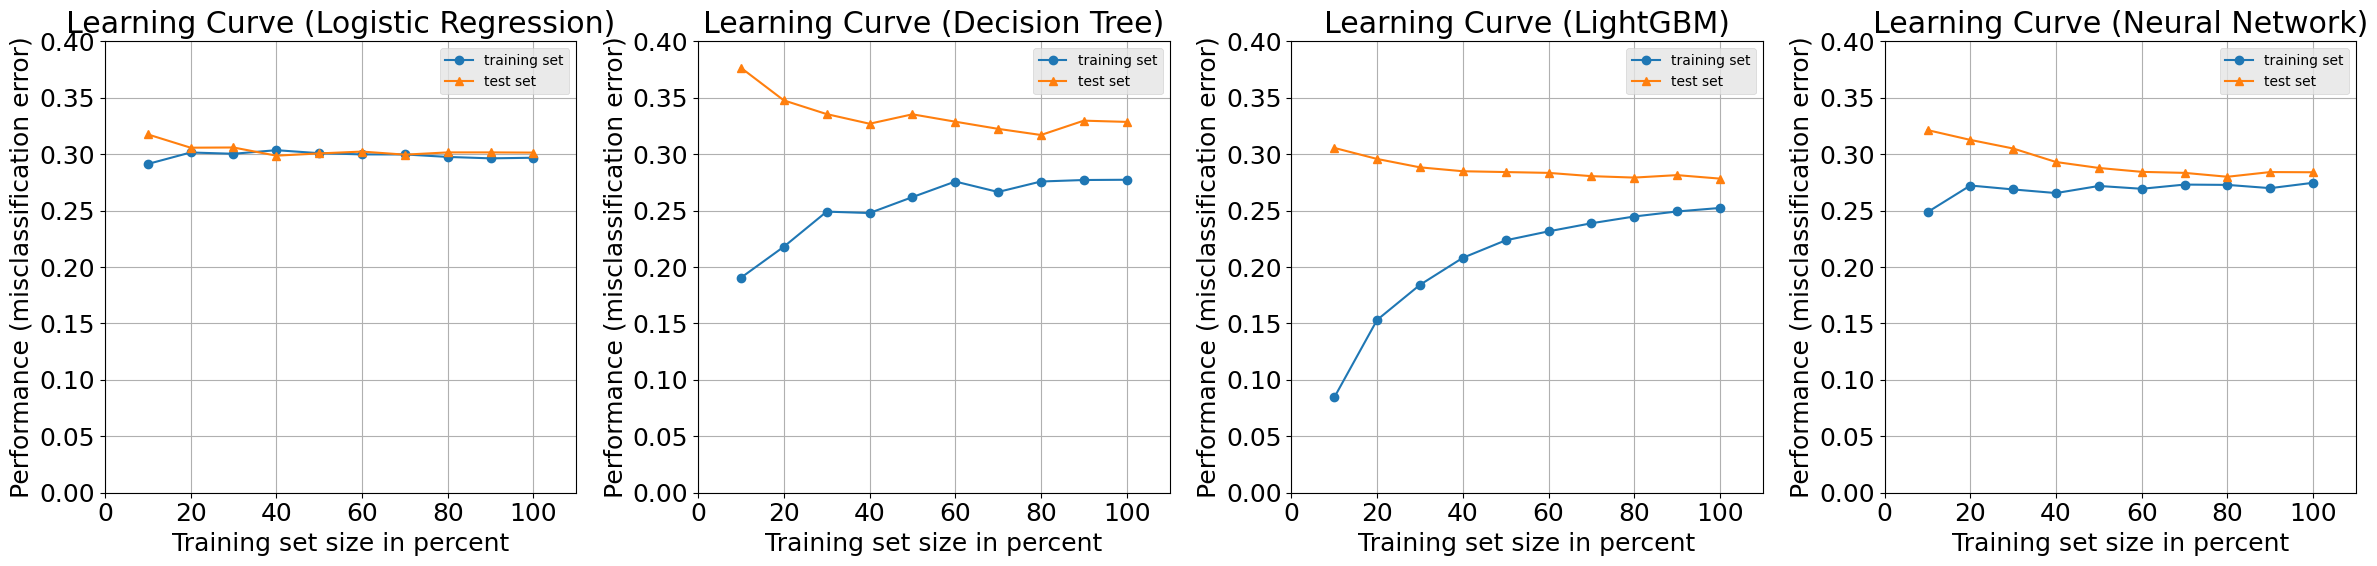

In [43]:
# Set up the plot grid for four subplots in one row
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Model list with titles and configurations
models = [
    (best_lr, 'Learning Curve (Logistic Regression)'),
    (best_dt, 'Learning Curve (Decision Tree)'),
    (best_lgbm, 'Learning Curve (LightGBM)'),
    (best_nn_lc, 'Learning Curve (Neural Network)')
]

# Loop over each model to plot its learning curve
for i, (model, title) in enumerate(models):
    plt.sca(axes[i])  # Set the current axes for this plot
    plot_learning_curves(X_train_selected, y_train, X_test_selected, y_test, model, 
                             print_model=False, style='ggplot')
    
    axes[i].set_title(title)
    axes[i].set_ylim(0, 0.4)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Overview of the learning curves:

1. **Logistic Regression**:
   - The training and test errors are very close and stable across different training sizes.
   - Both curves show minimal change as training size increases, indicating that the model has likely reached its capacity to fit the data - which isn’t improving with more data.

2. **Decision Tree**:
   - The training error is relatively low and increases slightly as training size grows, while the test error remains higher.
   - There’s a noticeable gap between the training and test error, indicating that the model is overfitting.
   - Adding more data may help reduce overfitting, but further tuning (e.g., pruning) might be more effective.

3. **LightGBM**:
   - There is a steady increase in training error as more data is added, while the test error decreases slightly but remains above the training error.
   - This model shows a healthy trend where training and test errors converge as training size grows, suggesting it generalises better with more data.
   - The gap between training and test error is smaller than in the Decision Tree, showing less overfitting.

4. **Neural Network**:
   - The training and test errors are initially higher, with a similar shape to LightGBM, indicating improvement with more data.
   - The training error stabilises at a certain level, with a slight gap from the test error, suggesting moderate overfitting.
   - The neural network might benefit from more tuning (e.g., regularisation) or additional data to reduce the test error further.

Overall, **LightGBM** and the **Neural Network** demonstrate better generalisation compared to the **Decision Tree**, with **Logistic Regression** slightly underperforming due to higher misclassification error.

### Learning Curve / Scalability / Performance

In [44]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring=None,
    nn_params=None
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or a scorer callable object / function 
        with signature scorer(estimator, X, y). 
        For classification: Can use 'recall' or 'f1' (for a specific class of the target) instead of accuracy

    nn_params : dict, default=None
        Dictionary of parameters for rebuilding the Keras model if it is detected as Keras Sequential.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    # If the estimator is a neural network, recreate the model each time with the best parameters trained for consistency
    if isinstance(estimator, keras.models.Sequential):
        # Use the best parameters to rebuild the Keras model
        estimator = keras.wrappers.scikit_learn.KerasClassifier(
            build_fn=lambda: create_model(meta=nn_params, **nn_params),
            epochs=best_epochs,
            batch_size=best_batch_size,
            class_weight = class_weights
        )

    # Calculate learning curve using the cloned model
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
        random_state=seed  
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times (seconds)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times (seconds)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

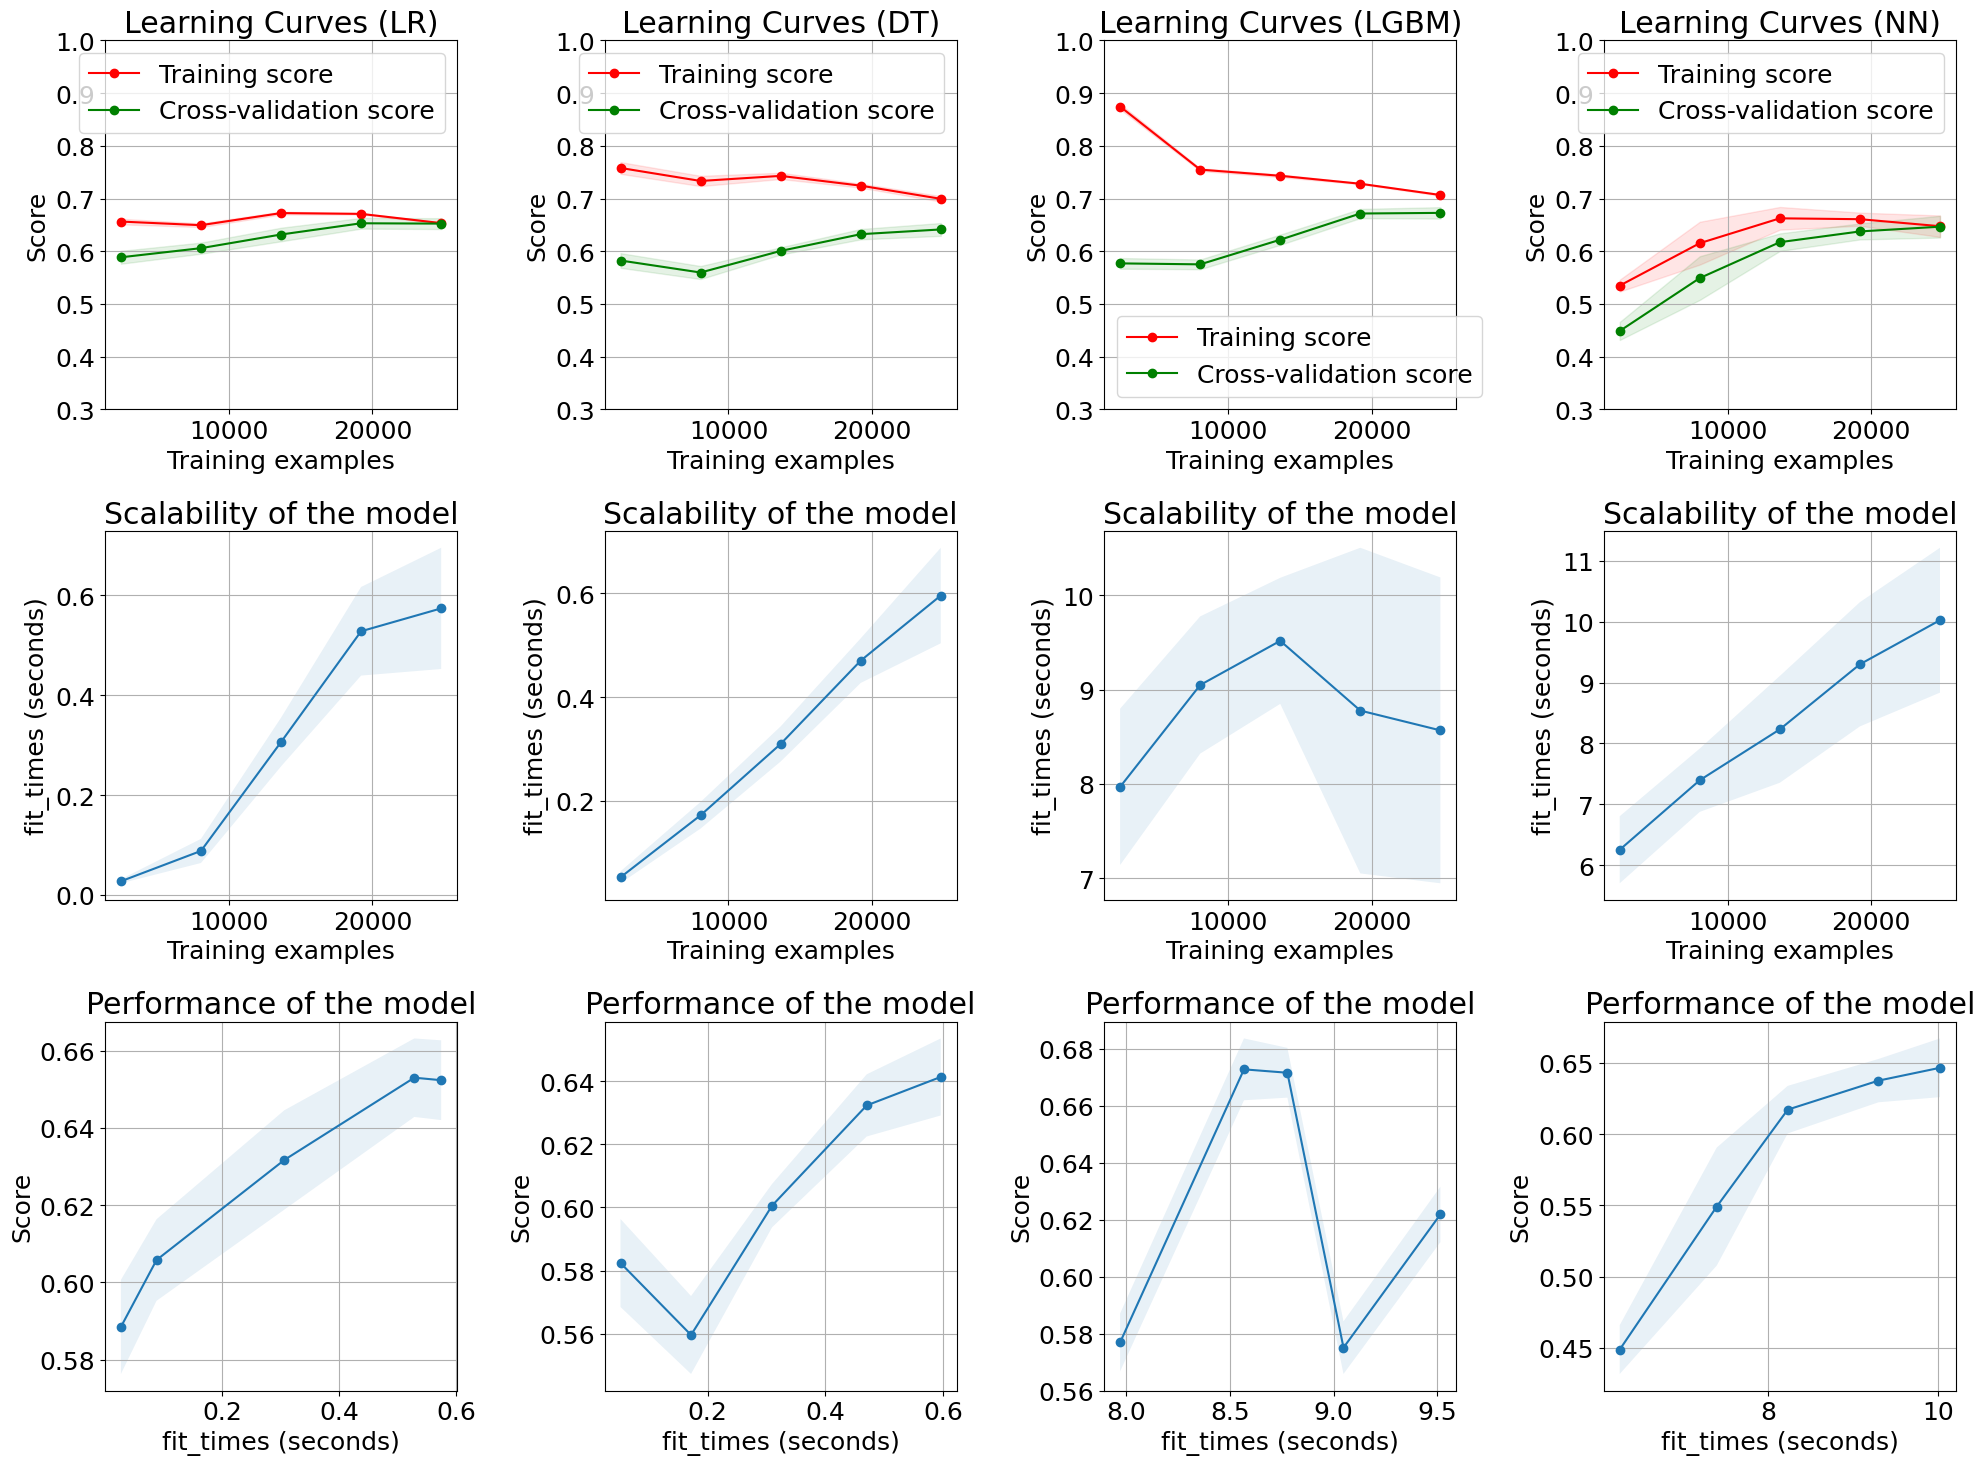

CPU times: total: 3 s
Wall time: 2min 4s


In [45]:
%%time
# np.random.seed(seed), tf.random.set_seed(seed), random.seed(seed)

# Set up the plot grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Define titles, models, and custom cross-validation strategies
# best_nn_copy = best_nn  # Copy the best_nn model to avoid retraining the original model
models = {
    'Learning Curves (LR)': {
        'model': best_lr,  # Accessing the trained model
    },
    'Learning Curves (DT)': {
        'model': best_dt, 
    },
    'Learning Curves (LGBM)': {
        'model': best_lgbm,
    },
    'Learning Curves (NN)': {
        'model': best_nn_lc,
    }
}

# Plot learning curves for each model with their respective CV strategies
for i, (title, config) in enumerate(models.items()):
    # Extract the model and cross-validation strategy
    model = config['model']
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    
    # Call the plot_learning_curve function
    plot_learning_curve(
        model,
        title,
        X[selected_features],
        y,
        axes=axes[:, i],  # Plot on the respective subplot column
        ylim=(0.3, 1),
        cv=cv,
        scoring=f1_class1_scoring,
        nn_params=nn_params,  # Pass the best parameters for the NN model
        n_jobs=-1  # Use all available processors
    )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Comments (k-fold cross-validation & evaluation using the whole dataset): 

The above plots provide a deeper insight into how each model generalises across folds and dataset sizes, which can help in making a well-rounded choice.

#### Learning Curves:

- **Logistic Regression**: Shows a consistent, narrowing gap between training and validation scores as more data is added, indicating a stable model that improves generalisation with more data.

- **Decision Tree**: Has a persistent gap between training and validation scores, suggesting overfitting. It performs well on the training set but struggles to generalise effectively to new data.

- **LightGBM**: The training score starts high, indicating potential overfitting, but it decreases as more data is added. The validation score steadily improves and converges closer to the training score, suggesting the model benefits from additional data and generalises better as it grows.

- **Neural Network**: Both training and validation scores improve with more data, converging around a similar score. This indicates that the model generalises reasonably well and may have reached its performance capacity on this dataset with the current configuration.

In summary, all 4 models improve with more data, but **LightGBM** shows better convergence and reaches a higher F1 score with better stability, making it a strong candidate for production due to its balanced generalisation.

#### Scalability Curves:
- **Logistic Regression**: The scalability curve for Logistic Regression shows a steady increase in fit time, which ranges from around 0.05 seconds with smaller datasets to approximately 0.7 seconds as the data size increases. The growth rate appears linear, indicating that the computational demand scales predictably with data size.

- **Decision Tree**: The Decision Tree model also exhibits a linear increase in fit time, rising from approximately 0.1 seconds to just above 0.4 seconds as the dataset size grows. This consistent increase reflects a stable scalability similar to Logistic Regression, though the Decision Tree maintains lower overall fit times.

- **LightGBM (LGBM)**: The fit times for LightGBM fluctuate slightly, with an overall range from approx. 8 to 10 seconds. This variability suggests some inconsistency in scalability, but fit times remain within a reasonable range as data size increases.

- **Neural Network**: It is the slowest,which shows a clear linear trend in fit time, steadily increasing from around 8 seconds to over 14 seconds, indicating heavier computational demand as data size increases.

#### Performance curves:

- **Logistic Regression**: Shows a steady improvement in performance as fit times increase, reaching a score around 0.66.

- **Decision Tree**: Performance fluctuates initially but eventually improves with longer fit times, stabilising around a score of 0.64.

- **LightGBM**: Performance fluctuates significantly with varying fit times, peaking around 0.68 but also experiencing sharp drops, indicating inconsistency.

- **Neural Network**: Performance steadily improves with longer fit times, stabilising around 0.65, showing a more predictable and gradual increase.

**Recommendation**:
Based on our priority criteria—**F1 score, training time, interpretability, model transparency, and scalability**, **LightGBM** and **Logistic Regression** are recommended as primary models, with LightGBM being the top choice if performance is paramount and Logistic Regression as a strong, interpretable backup.

1. **LightGBM**: This model consistently demonstrates strong performance in terms of F1 score and stability with increasing data, as seen in the learning and scalability curves. Although it shows some fluctuations in performance with fit times, LightGBM’s overall high F1 score and generalisation make it a strong choice for production. However, it is less interpretable compared to Logistic Regression but generally more efficient than Neural Networks.

2. **Logistic Regression**: Logistic Regression is highly interpretable and offers fast training times, which can be crucial for quick deployments. It maintains a steady performance improvement, though it achieves a slightly lower F1 score compared to LightGBM. Logistic Regression can be a practical alternative for stakeholders who prioritise simplicity, transparency, and ease of interpretation. 